In [ ]:
#! pip install tensorflow==2.1.0
import tensorflow
from tensorflow.keras.layers import Dense , Flatten , Conv2D , MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
from glob import glob
import pandas as pd
import numpy as np

In [ ]:
print(tensorflow.__version__)

2.1.0


In [ ]:
Train = "/content/drive/MyDrive/Snakes/Train"
Test = "/content/drive/MyDrive/Snakes/Test"

In [ ]:
IMAGE_SIZE = [224, 224]
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [ ]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [ ]:
# useful for getting number of output classes
#folders = glob('/content/drive/MyDrive/Snakes/Train')

In [ ]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [ ]:
prediction = Dense(4, activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [ ]:
#len(folders)
#print(prediction)

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
 
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory("/content/drive/MyDrive/Snakes/Train",
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
 
 
test_set = test_datagen.flow_from_directory("/content/drive/MyDrive/Snakes/Test",
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 258 images belonging to 4 classes.
Found 157 images belonging to 4 classes.


In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='rmsprop',
  metrics=['accuracy']
)

In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(training_set,epochs=40,validation_data=test_set)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 9 steps, validate for 5 steps
Epoch 1/40
9/9 [==============================] - 293s 33s/step - loss: 15.6014 - accuracy: 0.3566 - val_loss: 22.8258 - val_accuracy: 0.1465
Epoch 2/40
9/9 [==============================] - 9s 975ms/step - loss: 3.1252 - accuracy: 0.6667 - val_loss: 1.8549 - val_accuracy: 0.6943
Epoch 3/40
9/9 [==============================] - 9s 970ms/step - loss: 0.7291 - accuracy: 0.8372 - val_loss: 4.8904 - val_accuracy: 0.7197
Epoch 4/40
9/9 [==============================] - 9s 968ms/step - loss: 1.3744 - accuracy: 0.7636 - val_loss: 15.0941 - val_accuracy: 0.6497
Epoch 5/40
9/9 [==============================] - 9s 984ms/step - loss: 1.9467 - accuracy: 0.8062 - val_loss: 4.0351 - val_accuracy: 0.6688
Epoch 6/40
9/9 [==============================] - 9s 972ms/step - loss: 3.5381 - accuracy: 0.6744 - val_loss: 2.7488 - val_accuracy: 0.7580
Epoch 7/40
9/9 [==============================] - 9s 967ms/step - l

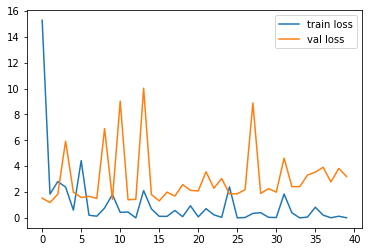

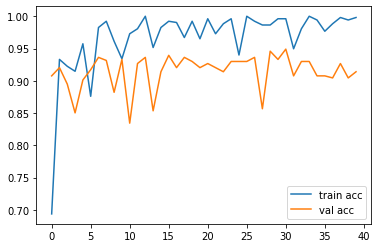

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:

# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('/content/drive/MyDrive/Snakes/model_inception.h5')